## Proyecto EDA - Analisis Jugadores RFEF 2023-2024

En este proyecto se busca analizar distintos aspectos relevantes que nos puedan brindar informacion sobre rendimientos de jugadores de futbol pertenecientes a la liga RFEF, de la temporada 2023-2024. 

El analisis estará segmentado en 3 partes:

* Presentar el DataSet y la informacion que contiene mediante una exploracion y limpieza de lo que nos puede ser irrelevante segun las hipotesis que queremos corroborar. 

* Realizar Analisis Univariante / Bivariante / Multivariante a fin mostrar la correlatividad de las variables que tenemos en nuestro DataSet. 

* Hacer una presentacion y concluciones a las hipotesis planteadas. 


En primer lugar, convierto la base de datos a un DataFrame de pandas para poder observarlo detenidamente y a medida que vaya teniendo informacion que puede ser util a lo largo del analisis, utilizarla y en caso de que no sea util descartarla. 

Antes de comenzar, importamos las librerias que me pueden ser utiles para el analisis. 

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.utils import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms,\
    plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot,\
        grafico_dispersion_con_correlacion
from scipy.stats import chi2_contingency, mannwhitneyu

import warnings
warnings.filterwarnings("ignore")

### Comenzamos con una exploracion y limpieza de datos: 
* En primer lugar, creamos un DataFrame de Pandas para poder visualizar los datos.

In [102]:
df_jugadores = pd.read_csv("./data/jugadores.csv")
df_jugadores

,id,nombre,partidos_jugados,partidos_titular,goles,asistencias,tarjeta_amarilla,edad,altura,valor,rating,posicion
0,0,Alberto Varo,34,34,21,1,2,31,191.000000,174640.0,59,Portero
1,2,Dani Parra,5,4,3,0,1,24,188.000000,91220.0,44,Portero
2,4,Joan Oriol,37,36,1,3,9,37,175.000000,119000.0,62,Lateral Izquierdo
3,5,P. Trigueros,37,37,5,1,6,31,188.000000,217500.0,57,Defensa Central
4,6,Nacho González,31,31,2,0,8,29,185.000000,340340.0,61,Defensa Central
...,...,...,...,...,...,...,...,...,...,...,...,...
10102,12529,A. Lopez,13,4,0,0,1,0,181.820179,1280.0,40,Mediocentro
10103,12530,Xesc Navalón,32,27,19,0,3,26,171.000000,24590.0,48,Delantero Centro
10104,12532,Juanca,19,12,6,0,3,30,180.344828,43710.0,47,Extremo Izquierdo
10105,12533,Álex Sánchez,30,22,11,0,2,19,180.883984,10760.0,42,Delantero Centro


* A simple vista haciendo un primer analisis de la informacion que nos brinda este DataSet se puede decir que: 

    * Vemos que la columna ID, tiene numeros en desorden y no se relaciona al numero de orden de filas, por lo que podemos pensar en eliminarla de nuestro DataSet.
    * La columna Goles para los jugadores que son Porteros son los goles que ha recibido en la temporada. 
    * Al parecer en algunos casos, la edad de los jugadores es 0, y esto es un error.
    * Si observamos los valores que tiene posicion, podemos ver que tienen valores que quieren decir lo mismo, pero de distinta manera, por lo tanto tengo que acomodarlos en la categoria que van. 


In [103]:
# Eliminamos la columna id.
df_jugadores.drop(columns=['id'],inplace=True)

In [104]:
# Y corroboramos que efectivamente ahora tenemos un DF de 11 columnas.
df_jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10107 entries, 0 to 10106
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nombre            10107 non-null  object 
 1   partidos_jugados  10107 non-null  int64  
 2   partidos_titular  10107 non-null  int64  
 3   goles             10107 non-null  int64  
 4   asistencias       10107 non-null  int64  
 5   tarjeta_amarilla  10107 non-null  int64  
 6   edad              10107 non-null  int64  
 7   altura            10107 non-null  float64
 8   valor             10107 non-null  float64
 9   rating            10107 non-null  int64  
 10  posicion          10107 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 868.7+ KB


* Por otro lado, vemos que el DataSet no tiene valores nulos, pero si tiene algunos que dependiendo el analisis pueden influir en los resultados por lo tanto los vamos a tener que tratar de alguna manera. (por ejemplo la Edad).

In [105]:
# Veo cuantos valores de edad = 0 hay.
df_jugadores.edad.value_counts(normalize=True).nlargest(5)

edad
0     0.132779
22    0.088552
20    0.087761
21    0.085683
23    0.079153
Name: proportion, dtype: float64

* Hay un 13% de valores que no me sirven en este DataSet, y como una de las preguntas principales que quiero resolver es si la edad influye en el rendimiento del jugador, no puedo asignar valores por media, moda o mediana, por lo que decido dejar de lado esas filas y eliminarlas del DF. Esto se puede plantear mas adelante obteniendo las edades de los jugadores. 

In [106]:
# Elimino las filas donde edad = 0. 
df_jugadores.drop(df_jugadores[df_jugadores['edad'] == 0].index, inplace=True)

In [107]:
# Veo el esquema de como queda el DataSet luego de modificaciones
df_jugadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8765 entries, 0 to 10106
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nombre            8765 non-null   object 
 1   partidos_jugados  8765 non-null   int64  
 2   partidos_titular  8765 non-null   int64  
 3   goles             8765 non-null   int64  
 4   asistencias       8765 non-null   int64  
 5   tarjeta_amarilla  8765 non-null   int64  
 6   edad              8765 non-null   int64  
 7   altura            8765 non-null   float64
 8   valor             8765 non-null   float64
 9   rating            8765 non-null   int64  
 10  posicion          8765 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 821.7+ KB


In [108]:
# Posicion de los jugadores. 
df_jugadores.posicion.value_counts()

posicion
Mediocentro              1729
Defensa Central          1623
Delantero Centro         1387
Portero                  1027
Lateral Derecho           619
Lateral Izquierdo         595
Extremo Derecho           495
Extremo Izquierdo         461
MP                        413
Mediocentro Defensivo     199
MI                         99
MD                         93
CAI                        12
CAD                         6
PT                          4
MPI                         2
MPD                         1
Name: count, dtype: int64

Al hacer el value counts de las posiciones me doy cuenta que hay grupos de posiciones practicamente "repetidas" y que se pueden agrupar dentro de una misma posicion reemplazando la que esta con las iniciales y la ubico en la que corresponda. 

Tomare como referencia las posiciones genericas, Portero, Defensa, Mediocampista, Delantero. 


In [109]:
df_jugadores['posicion'] = df_jugadores['posicion'].replace(['Defensa Central','CAI','CAD','Lateral Izquierdo','Lateral Derecho'],'Defensor')
df_jugadores['posicion'] = df_jugadores['posicion'].replace(['PT'], 'Portero')
df_jugadores['posicion'] = df_jugadores['posicion'].replace(['MPI', 'Extremo Izquierdo', 'MPD', 'Extremo Derecho', 'MP','Delantero Centro'], 'Delantero')
df_jugadores['posicion'] = df_jugadores['posicion'].replace(['MI', 'MD', 'Mediocentro Defensivo', 'Mediocentro'], 'Mediocampista')


In [110]:
df_jugadores.posicion.value_counts()

posicion
Defensor         2855
Delantero        2759
Mediocampista    2120
Portero          1031
Name: count, dtype: int64

In [130]:
# Agregare una nueva columna al DataSet para clasificar a los jugadores dentro de rangos de edad y les pondre nombre representativo. 
# Esto me va a servir para el analisis en el punto 5. 
def asignar_grupo_edad(edad):
    if edad <= 22:
        return 'Novatos'
    elif edad <= 28:
        return 'Jovenes'
    elif edad <= 35:
        return 'Adultos'
    else:
        return 'Mayores'

df_jugadores["grupo_edad"] = df_jugadores["edad"].apply(asignar_grupo_edad)

In [131]:
df_jugadores.grupo_edad.value_counts()

grupo_edad
Jovenes    3537
Novatos    3195
Adultos    1671
Mayores     362
Name: count, dtype: int64

Ahora si, DataSet listo para hacer analisis Univariante

### Analisis Univariante

Recorriendo cada variable/columna del DataSet, se indica cual es el significado de la columna para luego definir cuales son categoricas y numericas.


| Columna/Variable | Descripción | Tipo | Cat/Num |
| ---------------- | ----------- | ---- | ------- |
| Nombre          | Nombre del jugador | String | Numerica Continua |
| partidos_jugados   | Cantidad de partidos jugados en la temporada 2023 - 2024| Int | Numerica Discreta | 
| partidos_titular            | Cantidad de partidos que el jugador entro de titular | Int | Numerica Discreta | 
| goles         | Cantidad de goles que ha marcado en la temporada | Int | Numerica Discreta | 
| asistencias      | Número de padres/hijos a bordo | Int | Numerica Discreta | 
| tarjeta_amarilla           | Tarifa pagada por el pasajero | Int | Numerica Discreta | 
| edad        | Edad del jugador | Int | Numerica Discreta | 
| altura         | Altura del jugador | Float | Numerica Continua |
| valor            | En Euros, cuanto vale el jugador | Float | Numerica Continua |
| rating     | Puntaje medio del jugador en la temporada | Int | Numerica Discreta | 
| posicion          | Posicion del jugador | String | Categorica |
| grupo_edad | Clasificacion segun edad del jugador | String | Categorica |

In [132]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento


    return df_temp

In [133]:
card_tipo(df_jugadores)

,Card,%_Card,Tipo,tipo_sugerido
nombre,7436,84.837422,object,Numerica continua
partidos_jugados,36,0.410724,int64,Numerica discreta
partidos_titular,39,0.444952,int64,Numerica discreta
goles,61,0.69595,int64,Numerica discreta
asistencias,13,0.148317,int64,Numerica discreta
tarjeta_amarilla,19,0.216771,int64,Numerica discreta
edad,31,0.353679,int64,Numerica discreta
altura,3357,38.300057,float64,Numerica continua
valor,4598,52.458642,float64,Numerica continua
rating,45,0.513406,int64,Numerica discreta


#### *Variables Categoricas*

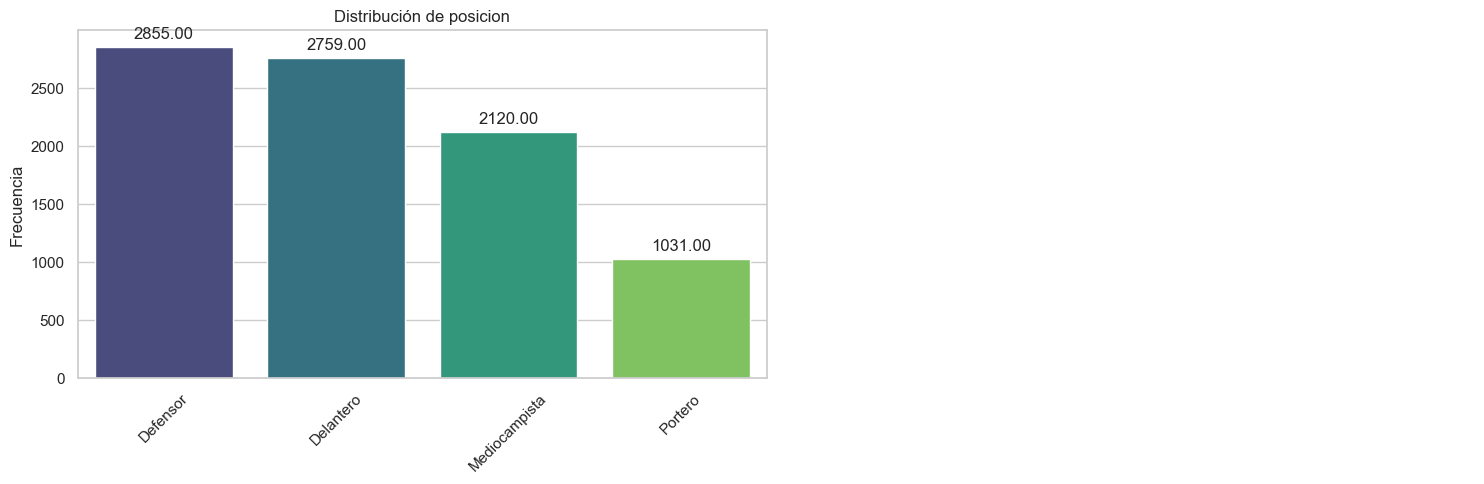

In [134]:
pinta_distribucion_categoricas(df_jugadores, ["posicion"], mostrar_valores= True)

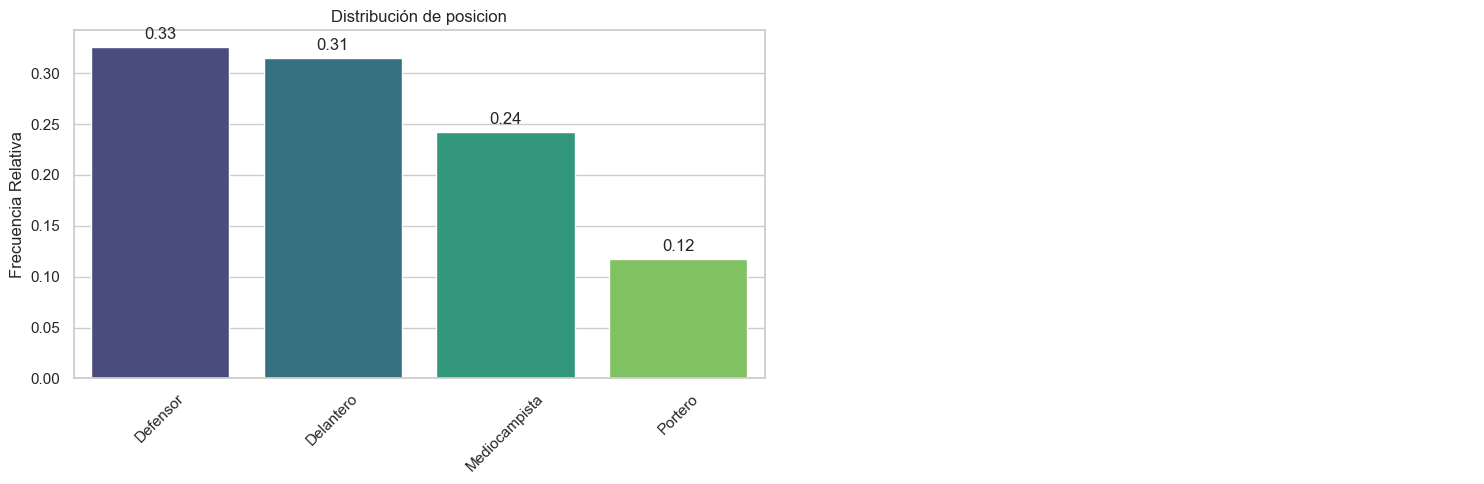

In [135]:
pinta_distribucion_categoricas(df_jugadores,["posicion"],relativa= True, mostrar_valores= True)

* Se puede observar la distribucion en la cual el 33% de los jugadores son Defensores, el 31% son Delanteros, el 24% Mediocampistas y en ultimo lugar un 12% para los Porteros. 

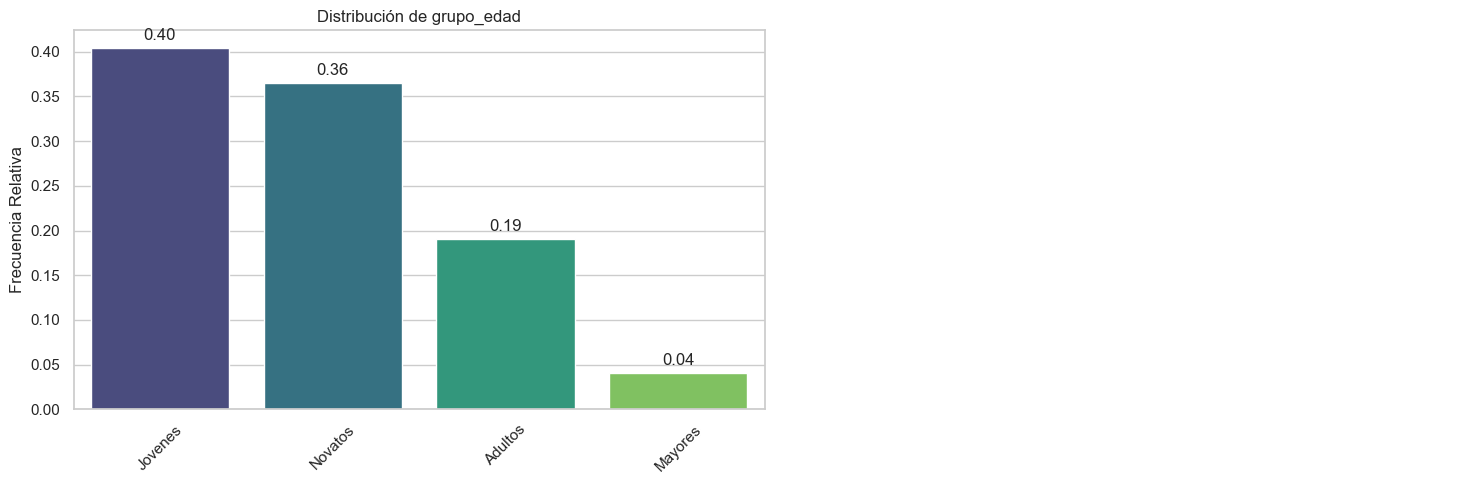

In [137]:
pinta_distribucion_categoricas(df_jugadores, ["grupo_edad"], relativa=True, mostrar_valores= True)

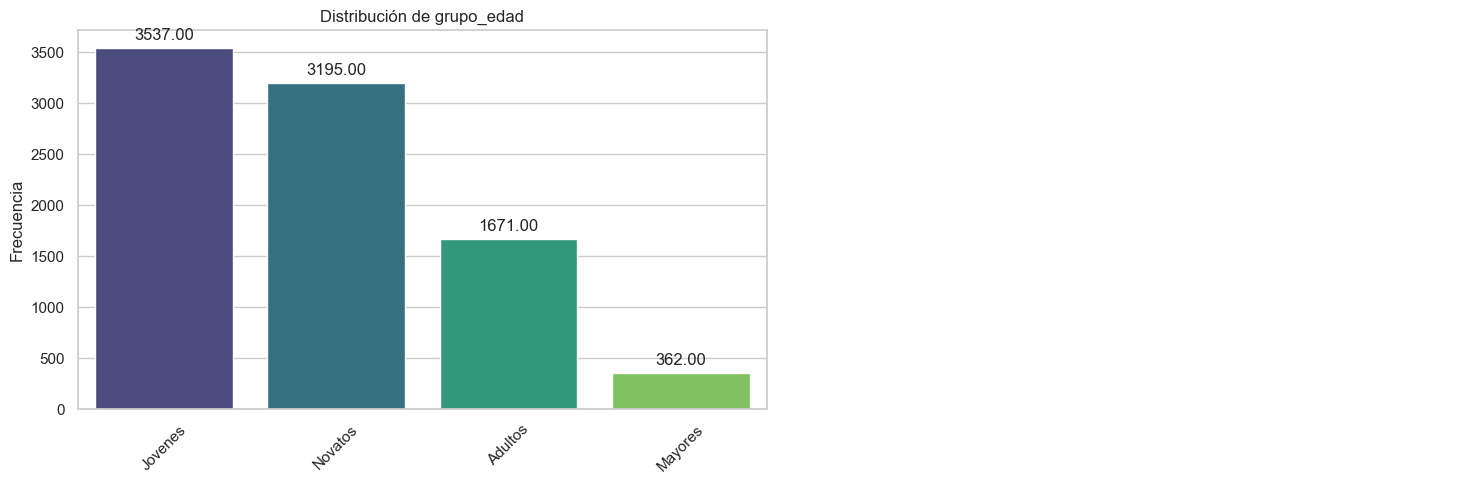

In [138]:
pinta_distribucion_categoricas(df_jugadores, ["grupo_edad"], mostrar_valores= True)

Recordando que la competicion engloba a todos los jugadores de la RFEF se indica que esta competicion tiene varias divisiones y sub grupos, y a medida que se aleja de la primera division de La Liga, menos competitivos seran los equipos, por lo que tal vez son mas permisivos con las edades que los jugadores tengan. Ese analisis se dejara para otro momento. 

Por el momento nos quedaremos que la mayor cantidad de jugadores son jovenes y novatos que van hasta un rango de edad de 28 años y los que predominan en la liga.

#### *Variables Numericas*

In [139]:
# Medidas de tendencia central y posicion
numericas = ['partidos_jugados','partidos_titular','goles','asistencias','tarjeta_amarilla','edad', 'altura', 'valor', 'rating']
df_jugadores[numericas].describe()


,partidos_jugados,partidos_titular,goles,asistencias,tarjeta_amarilla,edad,altura,valor,rating
count,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8.765000e+03,8765.000000
mean,22.515916,16.780719,3.602054,0.323788,3.923103,25.191443,180.580836,5.510466e+04,42.287735
std,8.998498,9.624396,7.039644,0.984075,3.126391,4.902434,4.673888,1.331034e+05,6.870272
min,3.000000,0.000000,0.000000,0.000000,0.000000,16.000000,160.000000,2.196100e+02,25.000000
25%,16.000000,9.000000,0.000000,0.000000,1.000000,21.000000,180.000000,3.770000e+03,38.000000
50%,25.000000,17.000000,1.000000,0.000000,3.000000,24.000000,180.686170,1.089000e+04,42.000000
75%,30.000000,25.000000,4.000000,0.000000,6.000000,28.000000,181.000000,4.153000e+04,47.000000
max,38.000000,38.000000,97.000000,17.000000,19.000000,47.000000,201.000000,3.370000e+06,70.000000


(9, 2)


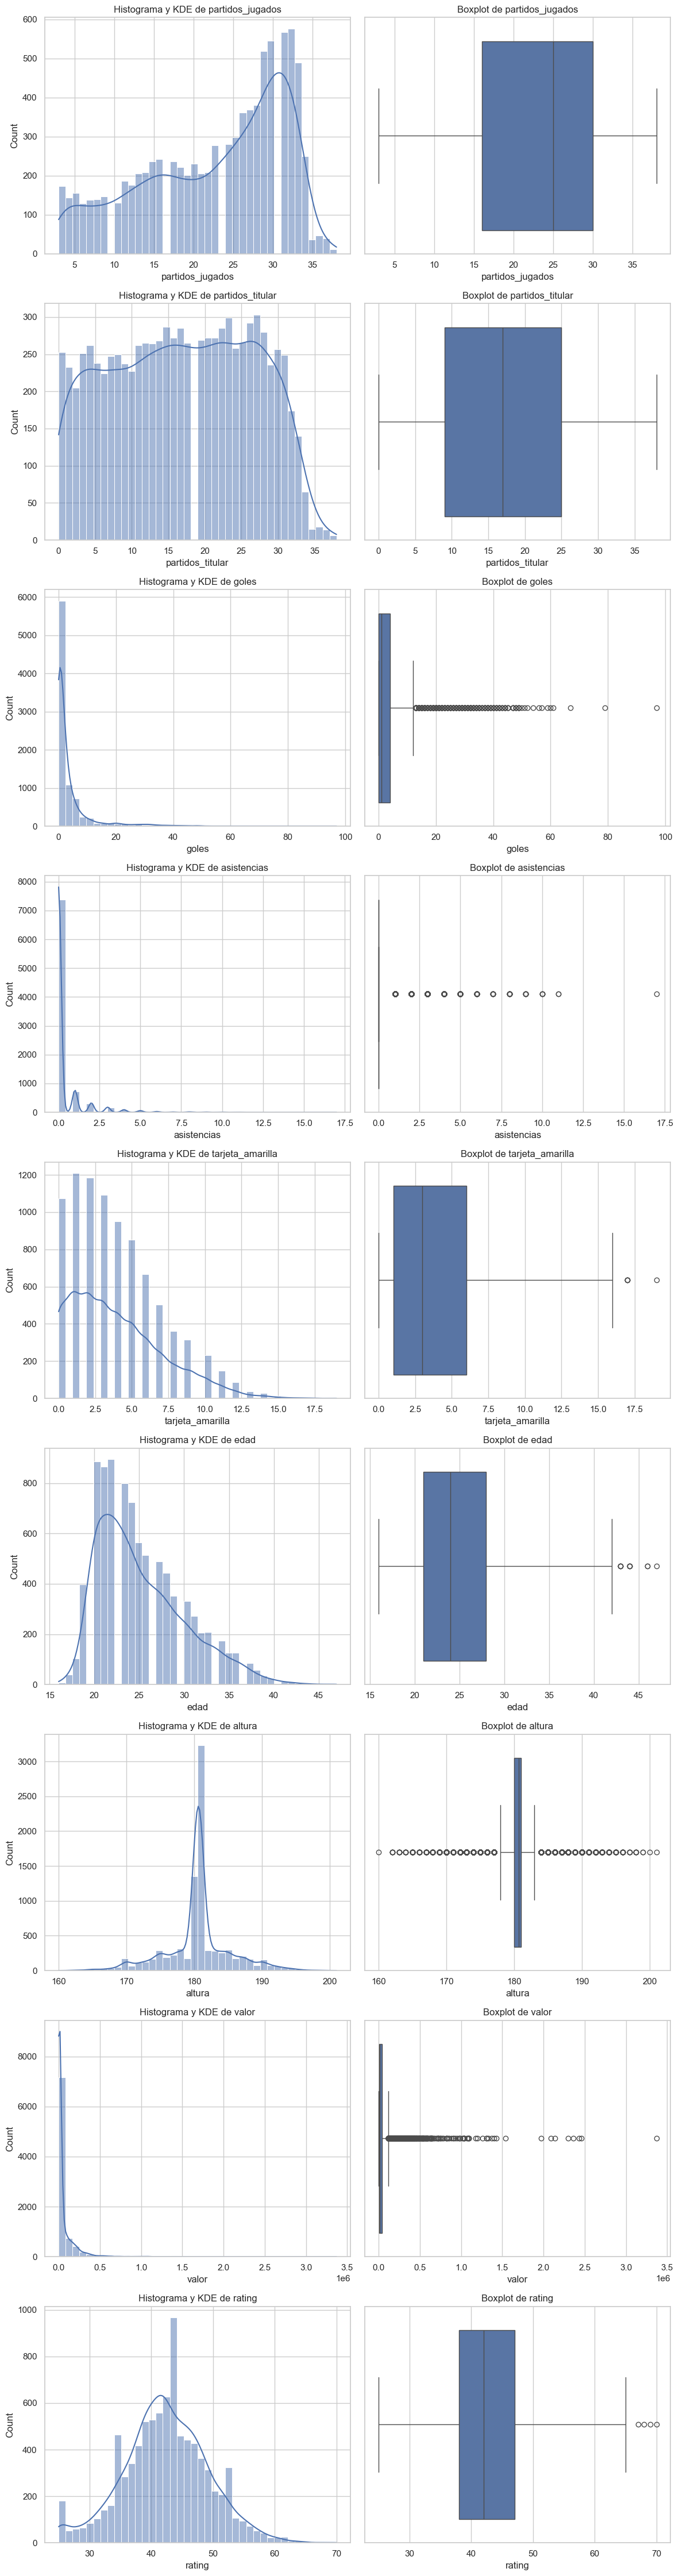

In [140]:
plot_combined_graphs(df_jugadores, numericas, whisker_width=2, bins = 40)

***Rendimiento segun:***

* **Edad**: *La distribucion del grafico es bastante normal, teniendo el rango de sus valores entre 16 y 47 años. Se puede ver que hay una gran dispersion en la edad desde el percentil 75% hasta el maximo esto nos puede estar diciendo que hay muchos valores y que pueden aparecer Outliers, los cuales podemos ver en el grafico de Boxplot. Con respecto a la mediana y la media estan cerca, por lo que para ser jugador de primera division es mas probable tener entre 21 y 28 años de edad.*

* **Rating**: *Esta variable se relaciona directamente con rendimiento. Por lo que nos puede servir para luego hacer comparaciones con edad, goles, asistencias. Por ejemplo, sube el rendimiento segun la cantidad de goles o asistencias? Pregunta importante, para los arqueros con menos goles tambien sube el rendimiento?
Respecto a su distribucion, tambien es normal, y la mayor cantidad de valores se centran entre 38 y 47 puntos viendo que la mediana y la media son practicamente iguales. Hay existencia de Outliers que los podemos tratar como "ejemplos" a la hora de ver que se tiene en cuenta en el puntaje.*

* **Goles y Asistencias**: *Esta informacion es muy personal al jugador, pero se espera un grafico completamente disperso donde la apariencia de outliers es inminente.*

* **Partidos Jugados/Titular**: *Estas dos variables nos pueden orientar en que podrian ser la consecuencia de un buen rating o rendimiento, ya que a mayor cantidad de partidos de titutlar se puede decir que el jugador es muy bueno y fundamental para su equipo, lo contrario nos daria un rendimiendo mas bajo.*

* **Tarjetas amarillas**: *Esto podria ayudarnos a entender la conducta de los jugadores durante la temporada, pero al parecer tiene tambien una distribucion normal, donde la media y la mediana difieren solo en un punto, la distribucion de los valores se concentra entre 1 y 6 tarjetas amarillas por jugador. Y hay existencia de outliers, por lo podrian plantearse advertencias a los clubes para mantener la conducta en la liga.*



### Analisis Multivariante

Para realizar el analisis multivariante lo que voy a realizar es la serie de preguntas que me interesan responder y ver si esto concuerda con el analisis previamente planteado.

Utilizare las herramientas que correspondan dependiendo de si son Variables Numericas y Categoricas y la combinacion correspondiente.

1. Se relaciona la estatura del jugador por la posicion en la que juega, teniendo en cuenta que los defensores, delanteros y porteros pueden ser mas altos que los mediocampistas? Y que pasa con la edad?

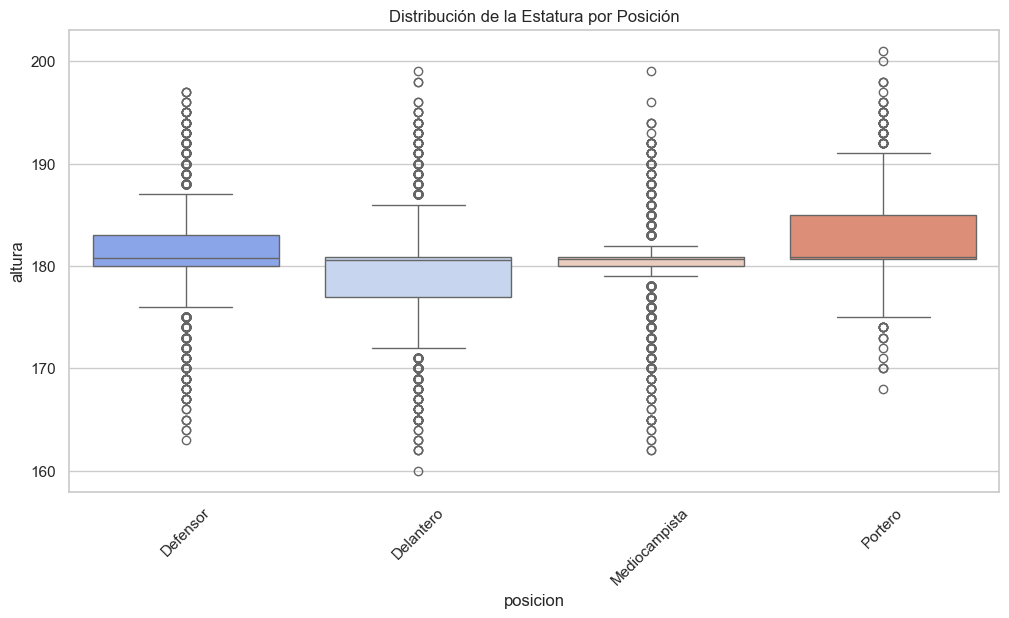

Altura promedio por posición:
 posicion
Portero          183.092042
Defensor         181.091457
Mediocampista    179.974162
Delantero        179.580212
Name: altura, dtype: float64


In [54]:
# Se compara la variable posicion (categorica) con la variable altura (numerica).

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Boxplot de la estatura por posición
sns.boxplot(x='posicion', y='altura', data=df_jugadores, palette='coolwarm', order=df_jugadores['posicion'].value_counts().index)
plt.title('Distribución de la Estatura por Posición')
plt.xticks(rotation=45)
plt.show()

# Calcular la media de estatura por posición
altura_media = df_jugadores.groupby('posicion')['altura'].mean().sort_values(ascending=False)
print("Altura promedio por posición:\n", altura_media)

**Respuesta altura:** Como lo esperaba, los porteros y los defensores se llevan el mayor promedio de estatura. No asi los delanteros, quienes estan por debajo de los mediocampistas. Esto se debe a las posiciones que se deben cubrir, ya que es requisito que en la porteria haya un jugador alto, y en la saga central lo mismo. 

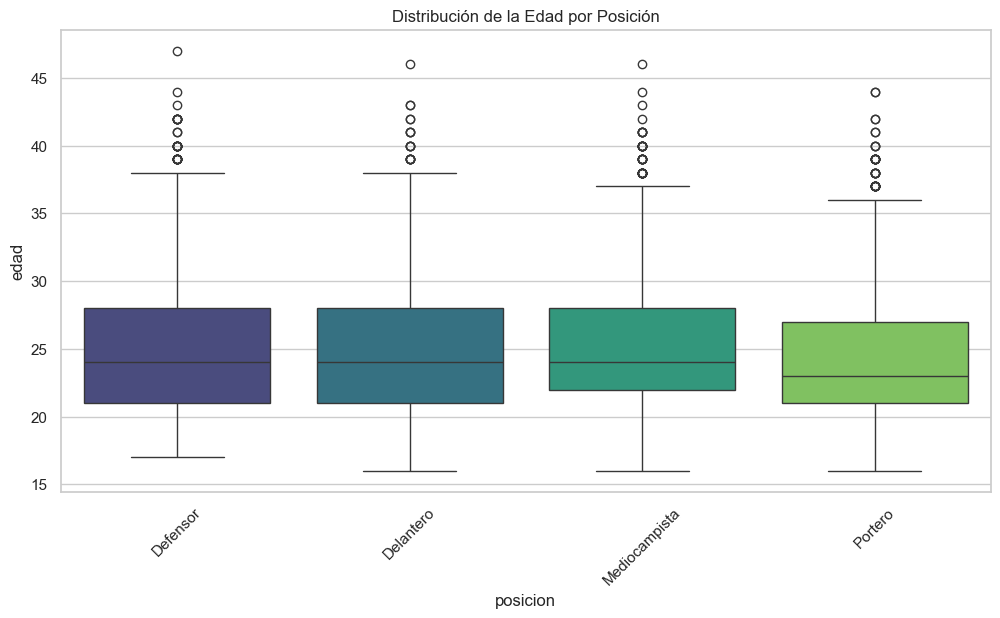

Edad promedio por posición:
 posicion
Defensor         25.342207
Mediocampista    25.222170
Delantero        25.197173
Portero          24.695441
Name: edad, dtype: float64


In [57]:
# Boxplot de la edad por posición
plt.figure(figsize=(12, 6))
sns.boxplot(x='posicion', y='edad', data=df_jugadores, palette='viridis', order=df_jugadores['posicion'].value_counts().index)
plt.title('Distribución de la Edad por Posición')
plt.xticks(rotation=45)
plt.show()

# Calcular la media de edad por posición
edad_media = df_jugadores.groupby('posicion')['edad'].mean().sort_values(ascending=False)
print("Edad promedio por posición:\n", edad_media)

**Respuesta edad:** En general en los equipos de categorias de elite, se ve que los jugadores mas experimentados se posicionan en la Porteria o en la saga central, pero en categorias mas inferiores al parecer no hay una relacion entre la posicion y la edad. 

2. En estas competencias, jugando en que posicion es mas probable que puedas recibir alguna tarjeta amarilla? 

Aqui los datos nos podran decir como fue la temporada 2023/2024 y para categorias que no son de la elite, pero esto es muy variante y se podria hacer un analisis a lo largo del tiempo. En general los que tienen mas experiencia en marca son los defensores, pero es real que son los que mas faltas comenten. Y los que menos experiencia tienen son las posiciones pasando el mediocampo, por lo que podria suponer una mayor cantidad de tarjetas amarillas. 

Proporción de tarjetas amarillas por posición:
posicion
Defensor         4.666900
Mediocampista    4.542925
Delantero        3.424792
Portero          1.922405
dtype: float64


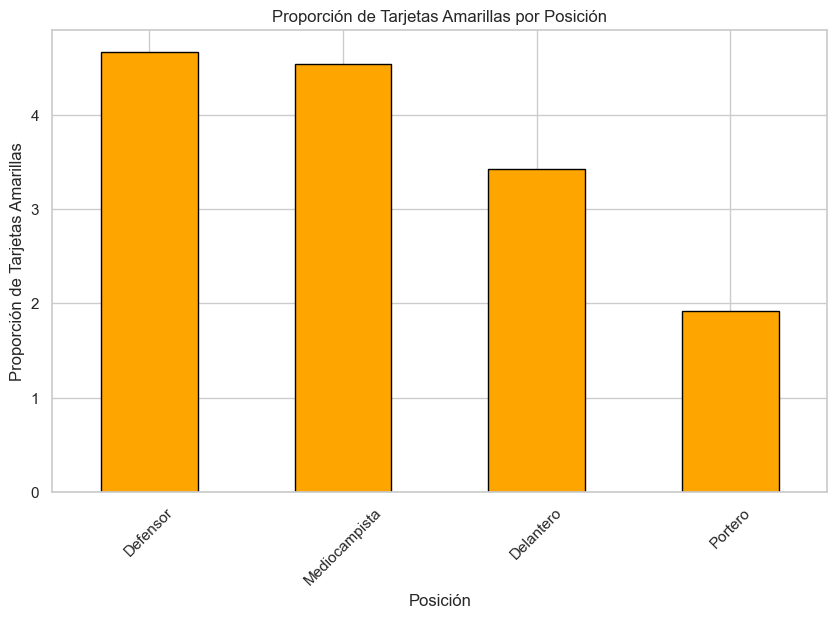

In [59]:
# Calcular el total de tarjetas amarillas y número de jugadores por posición
tarjetas_por_posicion = df_jugadores.groupby('posicion')['tarjeta_amarilla'].sum()
jugadores_por_posicion = df_jugadores['posicion'].value_counts()

# Calcular la proporción de tarjetas amarillas por jugador para cada posición
proporcion_tarjetas = tarjetas_por_posicion / jugadores_por_posicion
proporcion_tarjetas = proporcion_tarjetas.sort_values(ascending=False)

# Mostrar los resultados
print("Proporción de tarjetas amarillas por posición:")
print(proporcion_tarjetas)

# Visualización
plt.figure(figsize=(10, 6))
proporcion_tarjetas.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Proporción de Tarjetas Amarillas por Posición')
plt.xlabel('Posición')
plt.ylabel('Proporción de Tarjetas Amarillas')
plt.xticks(rotation=45)
plt.show()

**Respuesta tarjetas:** Los datos nos dicen que los defensores son aquellos que se llevan la mayor proporcion de amarillas, seguido por los mediocampistas, delanteros y por ultimo porteros (que son generalmente los que se ganan amarillas por hacer tiempo). Pensando en que este DataSet hace referencia a las ligas de menor categoria, esta bien que los defensores se lleven la mayor proporsion, pero aquellos defensores que no tengan muchas y tengan buen rating podrian pasar a primera division por buen rendimiento. 

3. Los delanteros mejor puntados son los que tienen mas goles? Si hacen mas goles, tienen mas partidos de titular? 

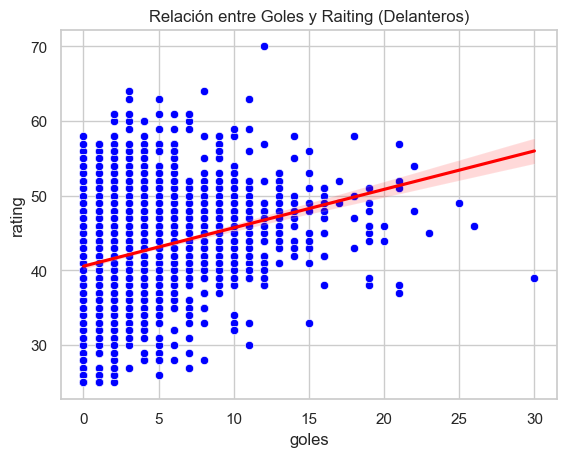

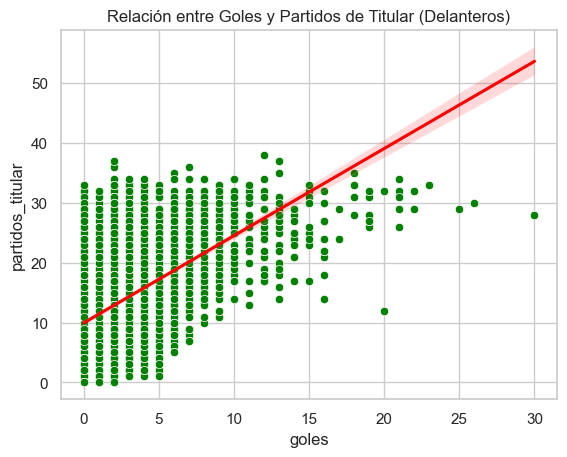

In [89]:
# 3

# Filtrar solo delanteros
delanteros = df_jugadores[df_jugadores['posicion'] == 'Delantero']

sns.scatterplot(data=delanteros, x='goles', y='rating', color='blue')
sns.regplot(data=delanteros, x='goles', y='rating', scatter=False, color='red')
plt.title("Relación entre Goles y Raiting (Delanteros)")
plt.show()

sns.scatterplot(data=delanteros, x='goles', y='partidos_titular', color='green')
sns.regplot(data=delanteros, x='goles', y='partidos_titular', scatter=False, color='red')
plt.title("Relación entre Goles y Partidos de Titular (Delanteros)")
plt.show()


**Respuesta 3**: El grafico nos muestra una gran dispersion en ambos casos, porque no es excluyente que un jugador haga un gol o no lo haga, o que juegue un partido de titular o no. Pero es cierto que se ve una correlacion positiva en el caso del raiting que obtiene y tambien se ve que si hace goles los partidos de titular que va a jugar aumentan. 

Para aquellos jugadores que son delanteros entonces deberian pensar en como mejorar sus tacticas para hacer goles si es que quieren jugar de titular mas partidos, en el caso del raiting hay muchos otros factores que pueden hacer que esta correlacion sea un poco mas debil. 


4. En este punto quiero evaluar si en general la competicion opta por tener dentro del campo jugadores mas experimentados, o si opta por jugadores sin tanta experiencia pero con mayor resistencia. Para este analisis, voy a hacer una segmentacion por edades, agrupando a los jugadores en una nueva categoria, por lo que creare una nueva columna para el DataSet. 

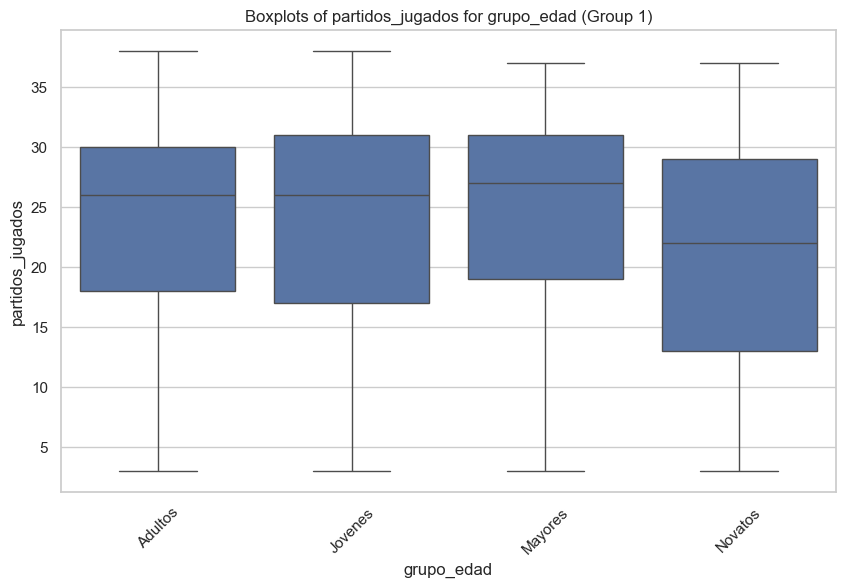

In [145]:
plot_grouped_boxplots(df_jugadores,"grupo_edad","partidos_jugados")

Es interesante de ver este grafico ya que en el dia de hoy y como el futbol se ha vuelto muy fisico generalmente se escogen entre jovenes y novatos para formar las plantillas, pero sin falta de adultos y mayores. Vemos que los mayores que quedan en los equipos tienen una participacion en los campeonatos muy grande, por eso es que su distribucion de valores es relativamente normal pero se ubica en la parte superior del grafico porque son los que mas partidos juegan en promedio.

In [150]:
df_jugadores.grupo_edad.value_counts()

grupo_edad
Jovenes    3537
Novatos    3195
Adultos    1671
Mayores     362
Name: count, dtype: int64

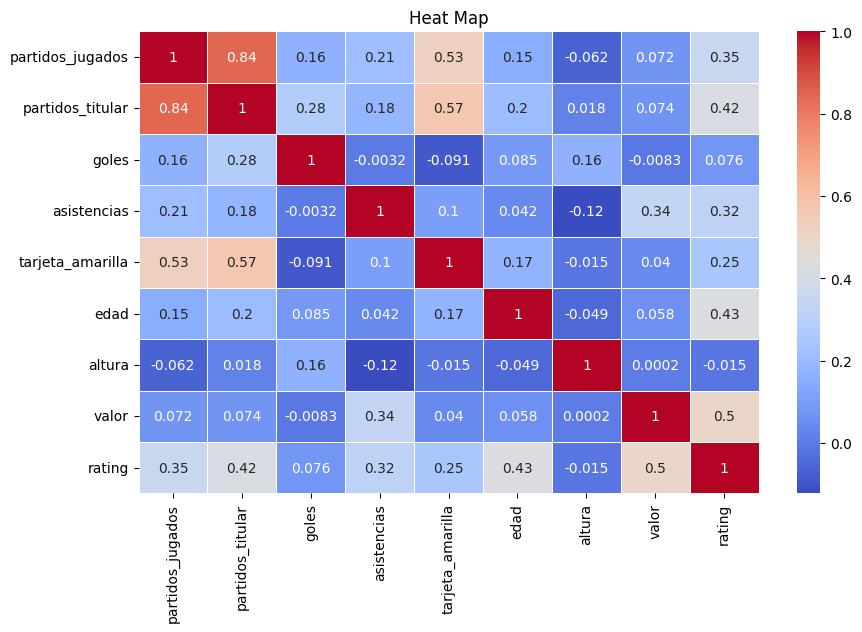

In [38]:
# HeatMap de correlacion entre variables numericas.
correlation = df_jugadores[numericas].corr()
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heat Map')
plt.show()

Para terminar con mi primera investigacion me interesa mostrar los 5 mejores jugadores por posicion, y sus respectivas caracteristicas, donde tal vez mas adelante se pueda aplicar un dashboard con visualizaciones mucho mas elaborado. Pero me gustaria ver si los mejores jugadores estan por debajo o por encima de la linea media de edad que teniamos antes. 

In [154]:
top_5_por_posicion = df_jugadores.sort_values(['posicion', 'rating'], ascending=[True, False]).groupby('posicion').head(5)
top_5_por_posicion

,nombre,partidos_jugados,partidos_titular,goles,asistencias,tarjeta_amarilla,edad,altura,valor,rating,posicion,grupo_edad
325,Einar Galilea,24,22,2,0,5,30,185.0,1310000.0,69,Defensor,Adultos
305,J. Martínez,8,7,0,0,1,31,191.0,2140000.0,68,Defensor,Adultos
353,A. Escassi,31,30,4,1,12,35,186.0,368700.0,65,Defensor,Adultos
769,David Andújar,16,16,1,0,5,32,189.0,619420.0,64,Defensor,Adultos
792,Pablo Vázquez,36,36,4,0,7,29,189.0,818290.0,64,Defensor,Adultos
805,Lucas Pérez,31,31,12,17,6,35,180.0,991770.0,70,Delantero,Adultos
343,Dioni,36,24,8,1,3,34,184.0,424600.0,64,Delantero,Adultos
434,Pedro León,30,20,3,8,5,37,183.0,1090000.0,64,Delantero,Mayores
642,Emilio Nsue,30,24,11,3,4,34,181.0,395480.0,63,Delantero,Adultos
782,Borja Valle,19,17,3,3,6,31,177.0,1040000.0,63,Delantero,Adultos


In [155]:
top_5_por_posicion.describe()

,partidos_jugados,partidos_titular,goles,asistencias,tarjeta_amarilla,edad,altura,valor,rating
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000
mean,26.950000,24.000000,7.950000,2.550000,4.650000,32.450000,183.950000,6.351180e+05,63.800000
std,9.428261,9.130631,8.293783,4.198684,2.924938,3.394655,5.276313,4.876168e+05,2.948684
min,8.000000,7.000000,0.000000,0.000000,0.000000,25.000000,174.000000,1.156600e+05,59.000000
25%,18.750000,16.750000,2.000000,0.000000,3.000000,30.750000,180.750000,3.343900e+05,61.750000
50%,30.000000,24.000000,4.000000,1.000000,5.000000,32.500000,184.500000,5.155700e+05,64.000000
75%,34.500000,31.000000,11.250000,3.250000,6.000000,34.250000,188.250000,8.616600e+05,65.000000
max,38.000000,38.000000,25.000000,17.000000,12.000000,40.000000,192.000000,2.140000e+06,70.000000


Segun el rating vemos los jugadores con mayor puntuacion por posicion y hay un dato muy interesante a tener en cuenta segun lo que habiamos planteado anteriormente con la edad. En este caso parece que los mejores jugadores por posicion son los que tienen mas experiencia, por lo tanto si soy un equipo de estas competiciones, tendria que pensar en tenerlos dentro del campo de juego. 

# VALORACIONES PARA DESPUES


Estoy intentando hacer web escraping con una pagina de internet que tiene los nombres de los jugadores y los equipos donde juegan, esa informacion me puede servir. 
Ademas como probablemente necesite hacer consultas por jugadores en especifico, hago la columna Nombre un indice para mi DataFrame

In [ ]:
df_jugadores.set_index("nombre", inplace = True)

In [29]:
df_jugadores.loc["Abel"]


,id,partidos_jugados,partidos_titular,goles,asistencias,tarjeta_amarilla,edad,altura,valor,rating,posicion
nombre,,,,,,,,,,,
Abel,2863,23,19,1,1,6,28,183.000000,180650.0,54,Defensa Central
Abel,7076,30,25,3,0,8,22,180.736354,14090.0,41,Delantero Centro
Abel,9278,25,22,0,0,5,28,182.000000,18240.0,48,Defensa Central


* El ejemplo de Abel me viene perfecto para saber si hay duplicados, y eso lo tengo que tener en cuenta a la hora de agregarle el equipo que corresponda.

* Las edades que estan en 0 modificarlas con la edad que va haciendo algun tipo de web scrapping o utilizando algun otro modelo. 